<center><h1 style="font-size:60px;"><b>Data Visualization</b></h1></center>
<h2 style="font-size:60px;"><b>Import Packages</b></h2>

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import numpy as np
from sklearn.utils import resample
from dython import nominal

<h2 style="font-size:60px;"><b>Get the Data</b></h2>

In [51]:
correlation_heartfailure_df = pd.read_csv("https://raw.githubusercontent.com/mrsonuk/LDS_Test/main/Test_data.csv", index_col=0)

In [52]:
correlation_heartfailure_df = correlation_heartfailure_df.drop(['Patient_ID', 'date' ], axis=1)
correlation_heartfailure_df['GenHealth'] = correlation_heartfailure_df['GenHealth'].replace(['Goo_d', 'goo_d', 'ExCellent'], ['Good', 'Good', 'Excellent'])

correlation_heartfailure_df['GenHealth'] = correlation_heartfailure_df['GenHealth'].replace(['Poor','Fair','Good','Very good','Excellent'], [0,1,2,3,4])

correlation_heartfailure_df['AgeCategory'] = correlation_heartfailure_df['AgeCategory'].replace([ '18-24', '25-29','35-39','30-34', '40-44', '45-49','50-54', '55-59','60-64','65-69','70-74', '75-79','80 or older'],
                                             [0,1,2,3,4,5,6,7,8,9,10,11,12])




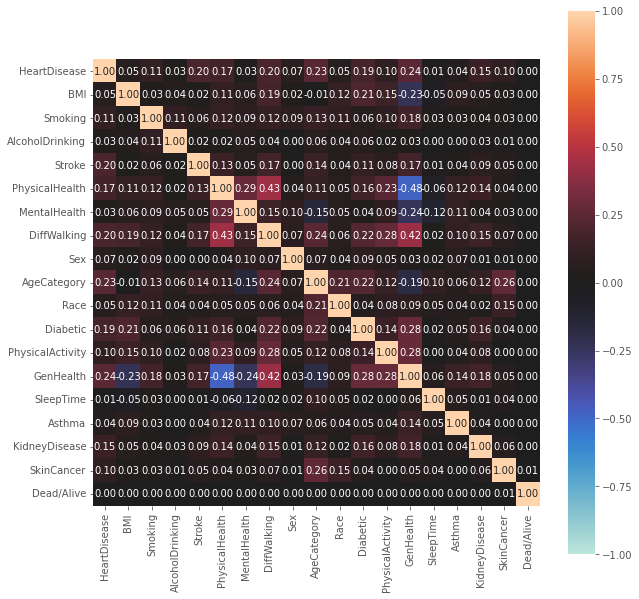

In [53]:
res = nominal.associations(correlation_heartfailure_df, [ 'HeartDisease', 'Smoking', 'AlcoholDrinking',
       'Stroke', 'DiffWalking', 'Sex', 'Race', 'Diabetic', 'PhysicalActivity',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'Dead/Alive'],
       nom_nom_assoc = "cramer",
        #filename = "correlation_of_the_features.png", 
        figsize = (10, 10))

In [57]:
###make the patient with HeartDisease and without HeartDisease equal
####downsampling:
heartfailure_df['AgeCategory'] = heartfailure_df['AgeCategory'].replace([ '18-24', '25-29','35-39','30-34', '40-44', '45-49','50-54', '55-59','60-64','65-69','70-74', '75-79','80 or older'],
                                             [0,1,2,3,4,5,6,7,8,9,10,11,12])
heartfailure_df_yes = heartfailure_df[heartfailure_df["HeartDisease"] == "Yes"]
heartfailure_df_no  = heartfailure_df[heartfailure_df["HeartDisease"] == "No"]
heartfailure_df_no_downsample = resample(heartfailure_df_no,
             replace=True,
             n_samples=len(heartfailure_df_yes),
             random_state=42)
heartfailure_df_downsampled = pd.concat([heartfailure_df_no_downsample, heartfailure_df_yes])

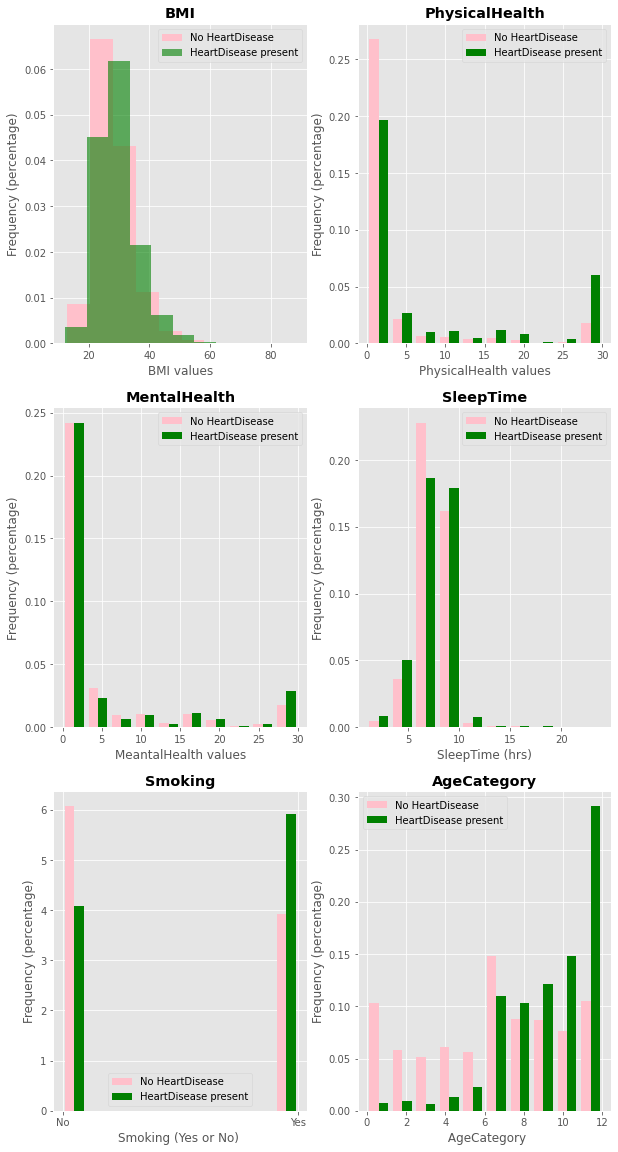

In [59]:
fig = plt.figure(figsize=(10, 20))
ax0 = fig.add_subplot(321)
ax1 = fig.add_subplot(322)
ax2 = fig.add_subplot(323)
ax3 = fig.add_subplot(324)
ax4 = fig.add_subplot(325)
ax5 = fig.add_subplot(326)



ax0.hist(heartfailure_df_no_downsample.BMI, color = "pink", label = "No HeartDisease", density=True)
ax0.hist(heartfailure_df_yes.BMI, color = "green", label = "HeartDisease present", alpha=0.6, density=True)
ax0.set_title('BMI', 
             fontweight ="bold")
ax0.set_xlabel("BMI values")
ax0.set_ylabel("Frequency (percentage)")
ax0.legend()

PhysicalHealth_data = [heartfailure_df_no_downsample.PhysicalHealth, heartfailure_df_yes.PhysicalHealth]
ax1.hist(PhysicalHealth_data, color = ["pink", "green"], label = ["No HeartDisease", "HeartDisease present"], density=True)
ax1.set_title('PhysicalHealth', 
             fontweight ="bold")
ax1.set_xlabel("PhysicalHealth values")
ax1.set_ylabel("Frequency (percentage)")
ax1.legend()


MentalHealth_data = [heartfailure_df_no_downsample.MentalHealth, heartfailure_df_yes.MentalHealth]
ax2.hist(MentalHealth_data, color = ["pink", "green"], label = ["No HeartDisease", "HeartDisease present"], density=True)
ax2.set_title('MentalHealth', 
             fontweight ="bold")
ax2.set_xlabel("MeantalHealth values")
ax2.set_ylabel("Frequency (percentage)")
ax2.legend()

SleepTime_data = [heartfailure_df_no_downsample.SleepTime, heartfailure_df_yes.SleepTime]
ax3.hist(SleepTime_data, color = ["pink", "green"], label = ["No HeartDisease", "HeartDisease present"], density=True)
ax3.set_title('SleepTime', 
             fontweight ="bold")
ax3.set_xlabel("SleepTime (hrs)")
ax3.set_ylabel("Frequency (percentage)")
ax3.legend()


Smoking_data = [heartfailure_df_no_downsample.Smoking, heartfailure_df_yes.Smoking]
ax4.hist(Smoking_data, color = ["pink", "green"], label = ["No HeartDisease", "HeartDisease present"], density=True)
ax4.set_title('Smoking', 
             fontweight ="bold")
ax4.set_xlabel("Smoking (Yes or No) ")
ax4.set_ylabel("Frequency (percentage)")
ax4.legend()

AgeCategory_data = [heartfailure_df_no_downsample.AgeCategory, heartfailure_df_yes.AgeCategory]
ax5.hist(AgeCategory_data, color = ["pink", "green"], label = ["No HeartDisease", "HeartDisease present"], density=True)
ax5.set_title('AgeCategory', 
             fontweight ="bold")
ax5.set_xlabel(" AgeCategory")
ax5.set_ylabel("Frequency (percentage)")
ax5.legend()



plt.show()